# Comparative Plots

In [36]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from advertools.emoji import extract_emoji, emoji_df
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Load data From 00-* pickles

In [191]:
!ls pickles/00-*

prefix = "00"

olympics = pd.read_pickle(f'pickles/{prefix}-olympics.pkl')
blue_girl = pd.read_pickle(f'pickles/{prefix}-bluegirl.pkl')
free_land = pd.read_pickle(f'pickles/{prefix}-free_land.pkl')
question_parliament = pd.read_pickle(f'pickles/{prefix}-question_parliament.pkl')
derby = pd.read_pickle(f'pickles/{prefix}-derby.pkl')
un_speech = pd.read_pickle(f'pickles/{prefix}-un_speech.pkl')
bimar = pd.read_pickle(f'pickles/{prefix}-bimar.pkl')

col1 = pd.read_pickle(f'pickles/{prefix}-col1.pkl')

pickles/00-bimar.pkl	 pickles/00-free_land.pkl
pickles/00-bluegirl.pkl  pickles/00-olympics.pkl
pickles/00-col1.pkl	 pickles/00-question_parliament.pkl
pickles/00-derby.pkl	 pickles/00-un_speech.pkl


# Clients

In [25]:
def extract_clients(df, threshold=40):
    _ = df.groupby('App').count()['Tweet ID']
    others = _[_<threshold].sum()
    _ = _.drop(index=_[_<threshold].index)
    _ = _.append(pd.Series([others], index=['others']))
    _ = _.sort_values(ascending=False)
    return _

''

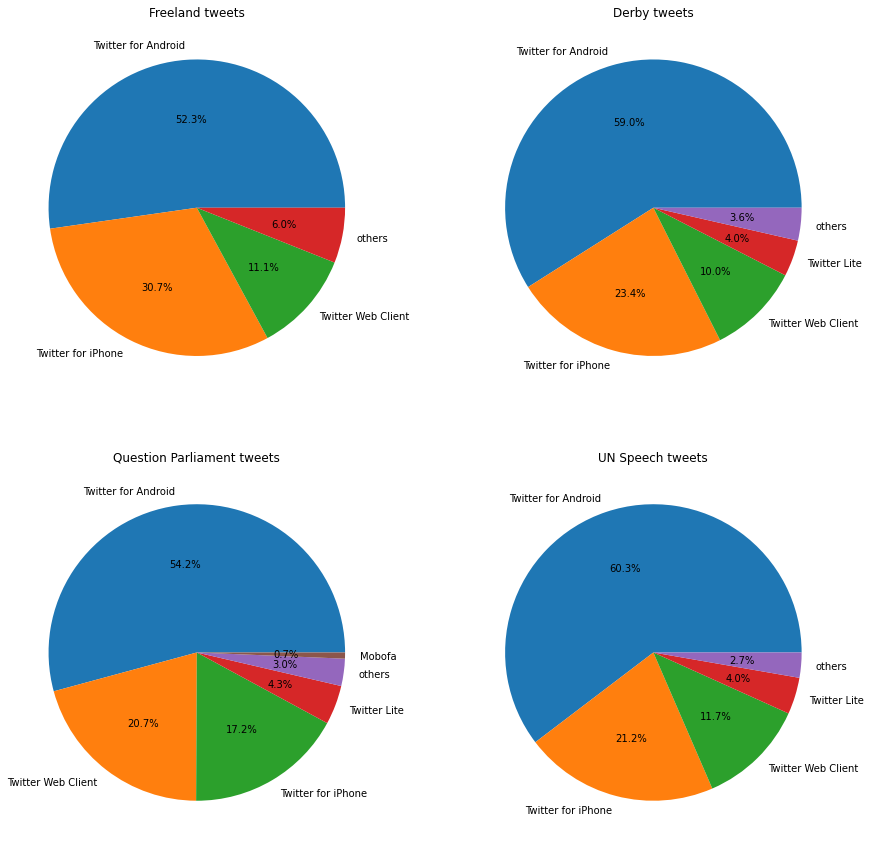

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

freeland_clients=extract_clients(free_land)
axs[0, 0].pie(freeland_clients, labels=freeland_clients.index, autopct='%1.1f%%');
axs[0, 0].set_title('Freeland tweets')

derby_clients=extract_clients(derby)
axs[0, 1].pie(derby_clients, labels=derby_clients.index, autopct='%1.1f%%');
axs[0, 1].set_title('Derby tweets')

question_parliament_clients=extract_clients(question_parliament)
axs[1, 0].pie(question_parliament_clients, labels=question_parliament_clients.index, autopct='%1.1f%%');
axs[1, 0].set_title('Question Parliament tweets')

un_speech_clients=extract_clients(un_speech)
axs[1, 1].pie(un_speech_clients, labels=un_speech_clients.index, autopct='%1.1f%%');
axs[1, 1].set_title('UN Speech tweets')

;

# Text Emojis

In [111]:
def text_emojis(df):
    emoji_results = extract_emoji(df['Tweet Text'])
    df['text_emojis'] = pd.Series(emoji_results['emoji'])
    
    return pd.DataFrame(emoji_results['top_emoji'], columns=['emoji', 'count']).set_index('emoji')

In [107]:
free_land_text_emojis = derby_text_emojis = question_parliament_text_emojis = un_speech_text_emojis= None

In [108]:
fig = make_subplots(rows=2, cols=2)
COUNT = 20

if free_land_text_emojis is None:
    free_land_text_emojis = text_emojis(free_land)
fig.add_trace(
    go.Bar(
        x=free_land_text_emojis.head(COUNT).index,
        y=free_land_text_emojis.head(COUNT)['count'] / free_land['text_emojis'].str.len().sum() * 100,
        name='Freeland'
    ),
    row=1,
    col=1,
)


if derby_text_emojis is None:
    derby_text_emojis = text_emojis(derby)
fig.add_trace(
    go.Bar(
        x=derby_text_emojis.head(COUNT).index, 
        y=derby_text_emojis.head(COUNT)['count'] / derby['text_emojis'].str.len().sum() * 100,
        name='Derby'
    ),
    row=1,
    col=2,
)


if question_parliament_text_emojis is None:
    question_parliament_text_emojis = text_emojis(question_parliament)
fig.add_trace(
    go.Bar(
        x=question_parliament_text_emojis.head(COUNT).index, 
        y=question_parliament_text_emojis.head(COUNT)['count'] / question_parliament['text_emojis'].str.len().sum() * 100,
        name='Question Parliament'
    ),
    row=2,
    col=1,
)


if un_speech_text_emojis is None:
    un_speech_text_emojis = text_emojis(un_speech)
fig.add_trace(
    go.Bar(
        x=un_speech_text_emojis.head(COUNT).index, 
        y=un_speech_text_emojis.head(COUNT)['count'] / un_speech['text_emojis'].str.len().sum() * 100,
        name='UN Speech'
    ),
    row=2,
    col=2,
)

# Bio Emojis

In [110]:
def bio_emojis(df):
    emoji_results = extract_emoji(df['Bio'])
    df['bio_emojis'] = pd.Series(emoji_results['emoji'])
    
    return pd.DataFrame(emoji_results['top_emoji'], columns=['emoji', 'count']).set_index('emoji')

In [115]:
free_land.Bio = free_land.Bio.astype(str)
derby.Bio = derby.Bio.astype(str)
question_parliament.Bio = question_parliament.Bio.astype(str)
un_speech.Bio = un_speech.Bio.astype(str)

In [116]:
free_land_bio_emojis = derby_bio_emojis = question_parliament_bio_emojis = un_speech_bio_emojis= None

In [117]:
fig = make_subplots(rows=2, cols=2)
COUNT = 20

if free_land_bio_emojis is None:
    free_land_bio_emojis = bio_emojis(free_land)
fig.add_trace(
    go.Bar(
        x=free_land_bio_emojis.head(COUNT).index,
        y=free_land_bio_emojis.head(COUNT)['count'] / free_land['bio_emojis'].str.len().sum() * 100,
        name='Freeland'
    ),
    row=1,
    col=1,
)


if derby_bio_emojis is None:
    derby_bio_emojis = bio_emojis(derby)
fig.add_trace(
    go.Bar(
        x=derby_bio_emojis.head(COUNT).index, 
        y=derby_bio_emojis.head(COUNT)['count'] / derby['bio_emojis'].str.len().sum() * 100,
        name='Derby'
    ),
    row=1,
    col=2,
)


if question_parliament_bio_emojis is None:
    question_parliament_bio_emojis = bio_emojis(question_parliament)
fig.add_trace(
    go.Bar(
        x=question_parliament_bio_emojis.head(COUNT).index, 
        y=question_parliament_bio_emojis.head(COUNT)['count'] / question_parliament['bio_emojis'].str.len().sum() * 100,
        name='Question Parliament'
    ),
    row=2,
    col=1,
)


if un_speech_bio_emojis is None:
    un_speech_bio_emojis = bio_emojis(un_speech)
fig.add_trace(
    go.Bar(
        x=un_speech_bio_emojis.head(COUNT).index, 
        y=un_speech_bio_emojis.head(COUNT)['count'] / un_speech['bio_emojis'].str.len().sum() * 100,
        name='UN Speech'
    ),
    row=2,
    col=2,
)

# Tag cloud

In [220]:
from wordcloud_fa import WordCloudFa
stopwords = np.loadtxt('data/50-stopwords.txt', dtype=str, delimiter="#")
stopwords = np.append(stopwords, np.loadtxt('custom_stopwords.txt', dtype=str, delimiter="#"))
stopwords = set(stopwords)

from PIL import Image
from os import path

from matplotlib.pyplot import imshow
%matplotlib inline

In [221]:
twitter_mask = np.array(Image.open("twitter-logo.jpg"))

In [222]:
def generate_tag_cloud(df):
    wordcloud = WordCloudFa(
        max_words=400,
        stopwords=stopwords,
        margin=0,
        width=800,
        height=800,
        min_font_size=1,
        max_font_size=500,
        random_state=True,
        background_color="white",
        mask=twitter_mask
    ).generate(df['Tweet Text'].str.cat())

    image = wordcloud.to_image()
    return image

In [223]:
free_land_tagcloud = derby_tagcloud = question_parliament_tagcloud = un_speech_tagcloud = None

''

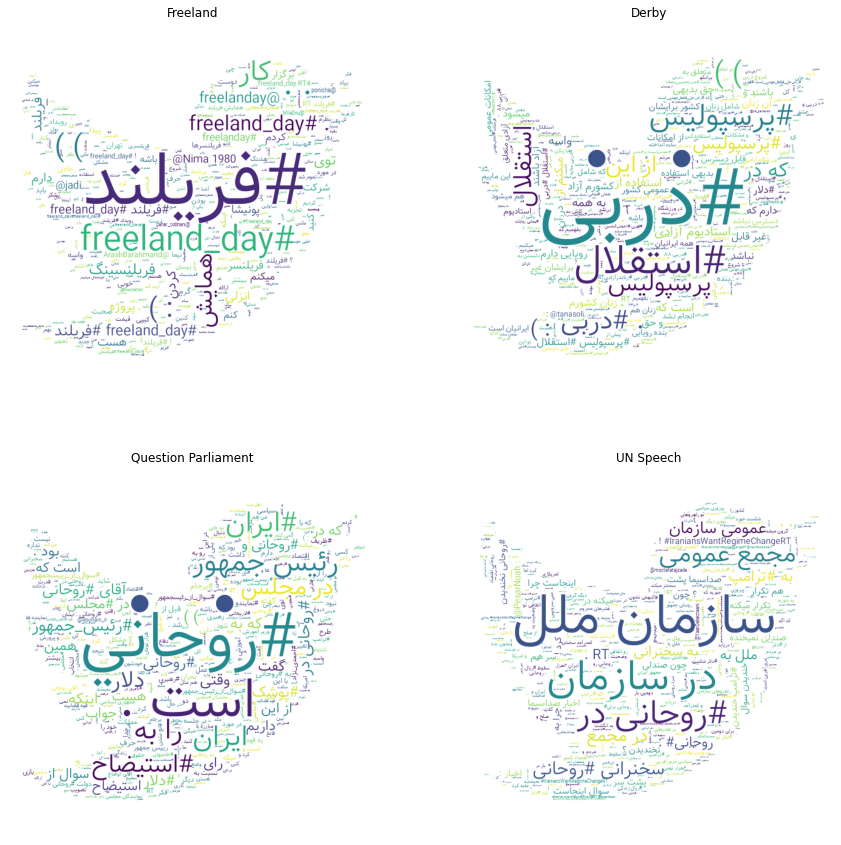

In [224]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].axis('off')
axs[0, 1].axis('off')
axs[1, 0].axis('off')
axs[1, 1].axis('off')


if free_land_tagcloud is None:
    free_land_tagcloud = generate_tag_cloud(free_land)
axs[0, 0].imshow(free_land_tagcloud)
axs[0, 0].set_title('Freeland')


if derby_tagcloud is None:
    derby_tagcloud = generate_tag_cloud(derby)
axs[0, 1].imshow(derby_tagcloud)
axs[0, 1].set_title('Derby')


if question_parliament_tagcloud is None:
    question_parliament_tagcloud = generate_tag_cloud(question_parliament)
axs[1, 0].imshow(question_parliament_tagcloud)
axs[1, 0].set_title('Question Parliament')


if un_speech_tagcloud is None:
    un_speech_tagcloud = generate_tag_cloud(un_speech)
axs[1, 1].imshow(un_speech_tagcloud)
axs[1, 1].set_title('UN Speech')
;